In [1]:
from QC4QWG import *
import scipy as sp
import networkx as nx
G= nx.Graph()
G.add_edges_from([(0, 1), (0, 2),(1,2)])
# G.add_edges_from([(0, 1), (0, 4), (0, 5), (1, 0), (1, 2), (1, 4), (1, 5), (2, 1), (2, 3), (2, 5), (2, 6),(3, 2), (3, 6), 
#                   (4, 0), (4, 1), (4, 5), (4, 8), (4, 9), (4, 10),(5, 0), (5, 1), (5, 2), (5, 4), (5, 6), (5, 9), (5, 10),
#                   (6, 2), (6, 3), (6, 5), (6, 10),(8, 4), (8, 11), (9, 4), (9, 5), (9, 10), (9, 11),
#                   (10, 4), (10, 5), (10, 6), (10, 9), (10,11),(11, 8), (11, 9)])

qc1 =QC4QWG(G,1)

op
['001', [Qubit(QuantumRegister(2, 't0'), 0), Qubit(QuantumRegister(2, 't0'), 1), Qubit(QuantumRegister(1, 'coin2'), 0)], [Qubit(QuantumRegister(2, 't1'), 0)]]
op
['001', [Qubit(QuantumRegister(2, 't0'), 0), Qubit(QuantumRegister(2, 't0'), 1), Qubit(QuantumRegister(1, 'coin2'), 0)], [Qubit(QuantumRegister(2, 't1'), 0)]]
op
['011', [Qubit(QuantumRegister(2, 't0'), 0), Qubit(QuantumRegister(2, 't0'), 1), Qubit(QuantumRegister(1, 'coin2'), 0)], [Qubit(QuantumRegister(2, 't1'), 0)]]


In [2]:
qc1.draw()

OrderedDict([('x', 4), ('h', 2), ('crz', 2), ('cu3', 2), ('ccx', 2), ('bmx', 2)])


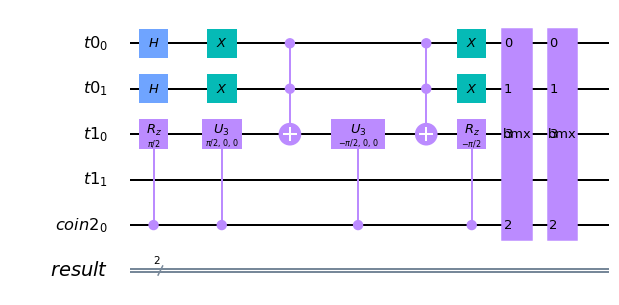

In [4]:
from qiskit.transpiler import PassManager
from CongX.transpiler.passes.unroll_cong import UnrollCong
# Unroll the circuit
pass_ = UnrollCong()
pm = PassManager(pass_)
new_circuit = pm.run(qc1) 
new_circuit.draw(output='mpl')
# obtain gates
gates=new_circuit.count_ops()
print(gates)
new_circuit.draw(output='mpl')

In [5]:
from qiskit.transpiler.passes import Unroller
from qiskit.transpiler.passes import Optimize1qGates
# Unroll the circuit
pass_ = Unroller(['u3', 'cx', 'h', 'x', 'ccx'])
pm = PassManager(pass_)
pass_ = Optimize1qGates()
pm = PassManager(pass_)
new_circuit = pm.run(qc1) 
new_circuit.draw(output='mpl')
# obtain gates
gates=new_circuit.count_ops()
print(gates)

OrderedDict([('bmx', 3), ('h', 2)])


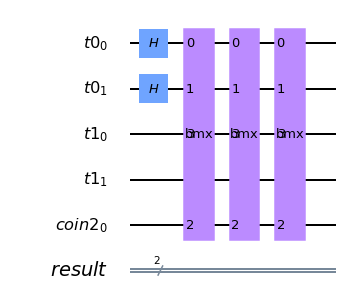

In [6]:
new_circuit.draw(output='mpl')